In [9]:
import pandas as pd
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [11]:
df=pd.read_csv("/content/train.csv")

In [12]:
df.head(5)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [13]:
df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [14]:
df.shape

(37500, 19)

In [15]:
df.isna().sum()

,0
index,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0


In [16]:
df.drop(columns=['user/ageInSeconds','user/birthdayRaw','user/birthdayUnix','user/gender','user/profileName'],inplace=True)

In [17]:
len(df['beer/style'].unique())

95

In [18]:
df = df.dropna(subset=['review/text'])

In [19]:
df.isna().sum()

,0
index,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0


EDA


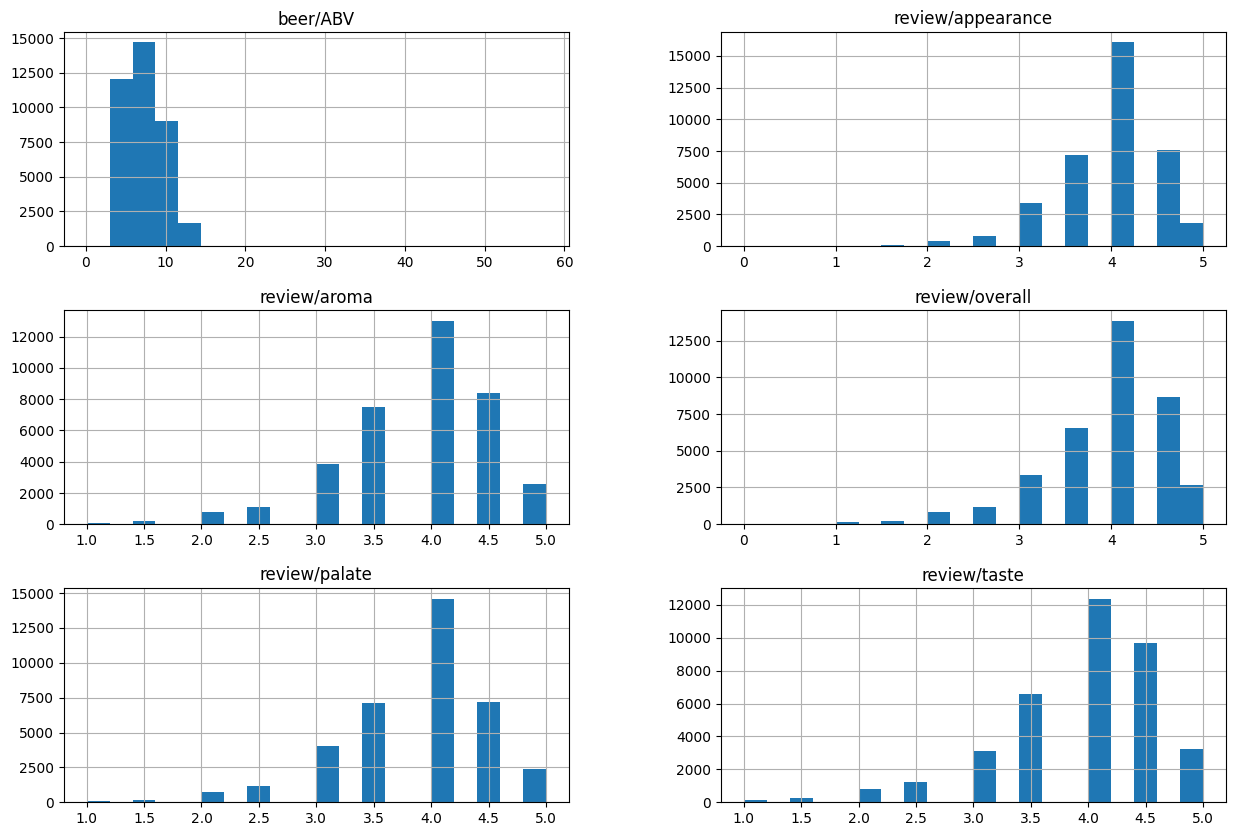

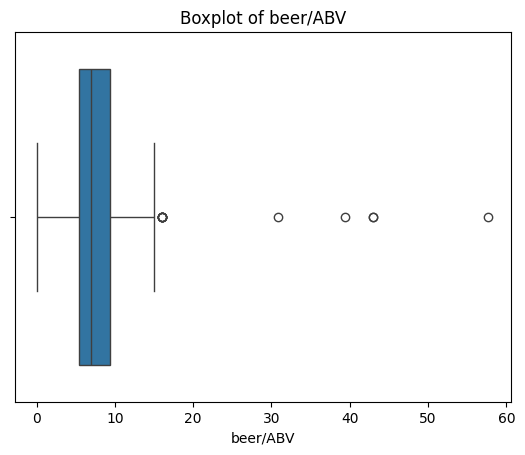

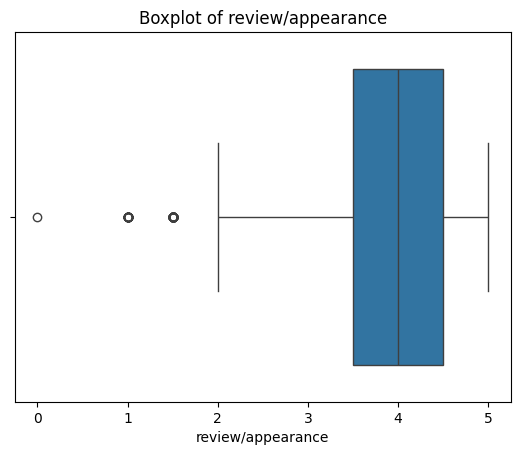

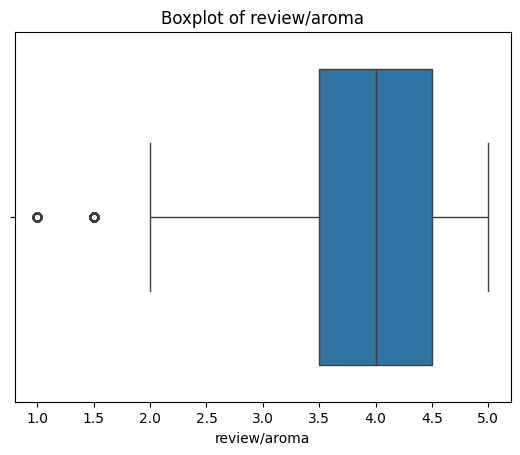

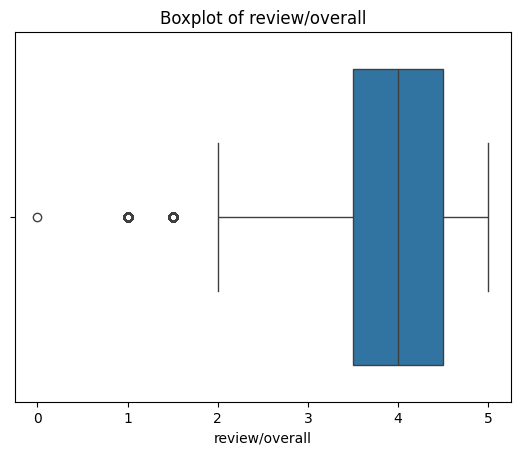

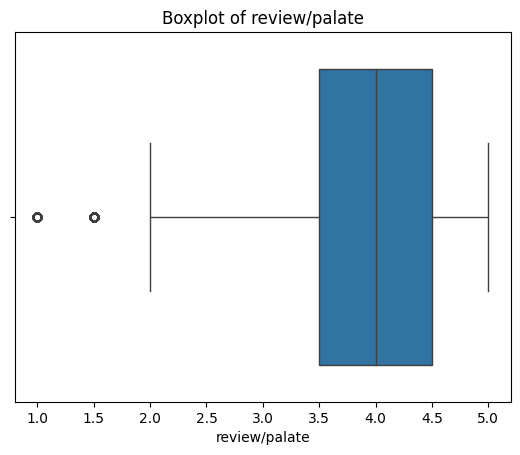

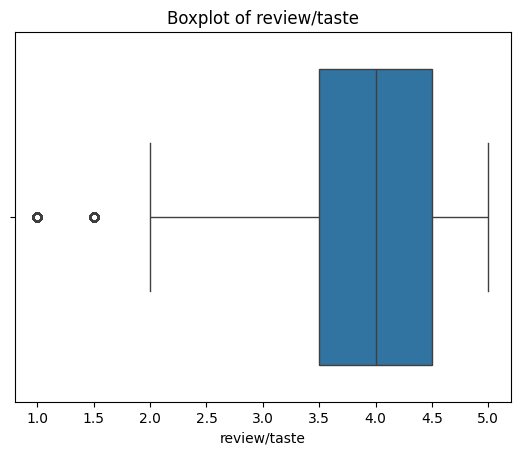

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = ['beer/ABV', 'review/appearance', 'review/aroma',
                     'review/overall', 'review/palate', 'review/taste']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.show()

for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [21]:
pip install wordcloud

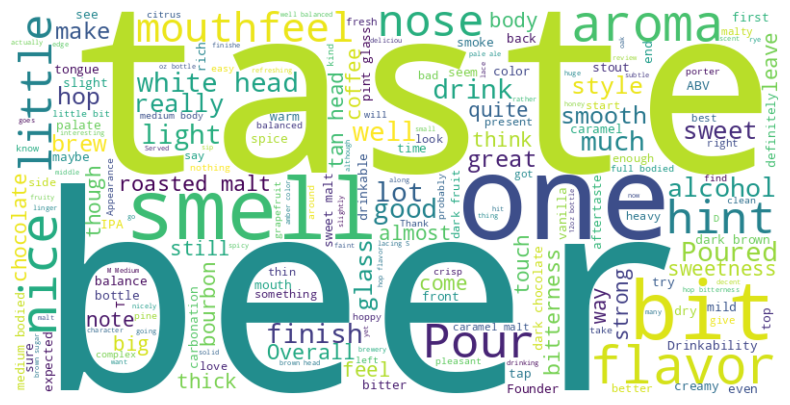

In [22]:
from wordcloud import WordCloud

text = " ".join(review for review in df['review/text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


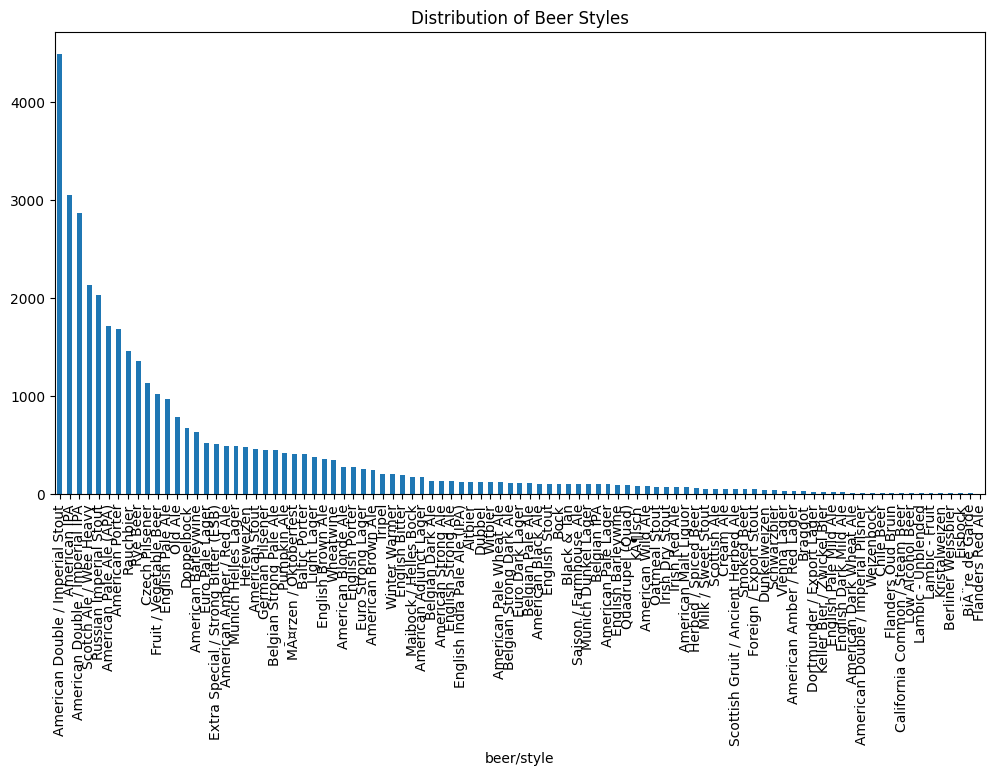

In [23]:
style_counts = df['beer/style'].value_counts()
style_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Distribution of Beer Styles")
plt.show()


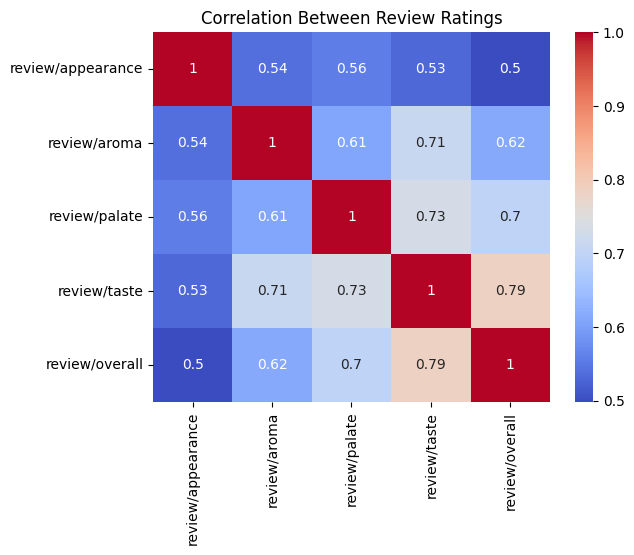

In [24]:
correlation_matrix = df[['review/appearance', 'review/aroma', 'review/palate',
                           'review/taste', 'review/overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Review Ratings")
plt.show()


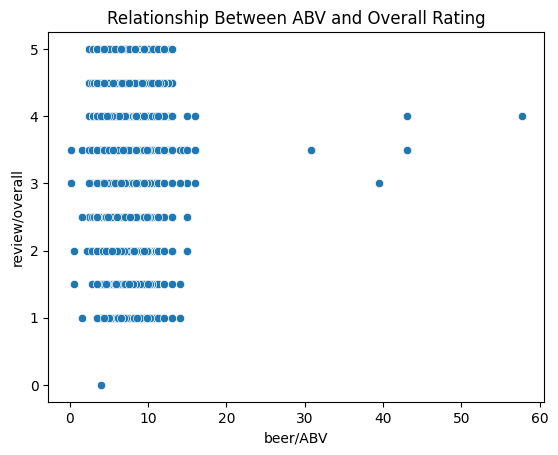

In [25]:
sns.scatterplot(x='beer/ABV', y='review/overall', data=df)
plt.title("Relationship Between ABV and Overall Rating")
plt.show()


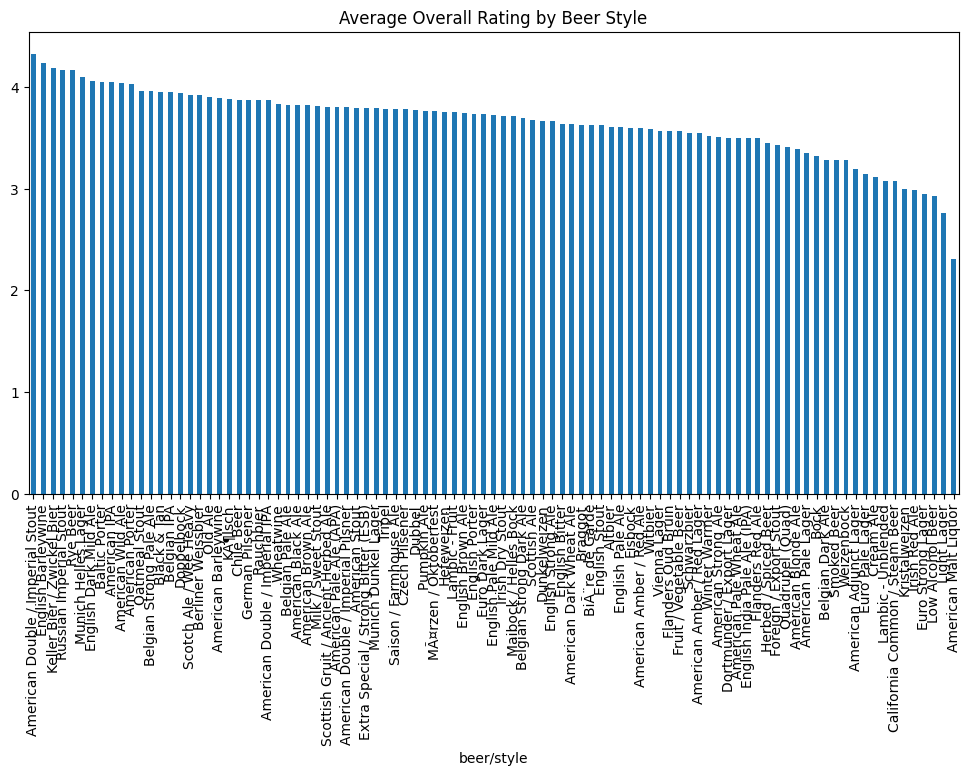

In [26]:
style_avg_rating = df.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False)
style_avg_rating.plot(kind='bar', figsize=(12, 6))
plt.title("Average Overall Rating by Beer Style")
plt.show()


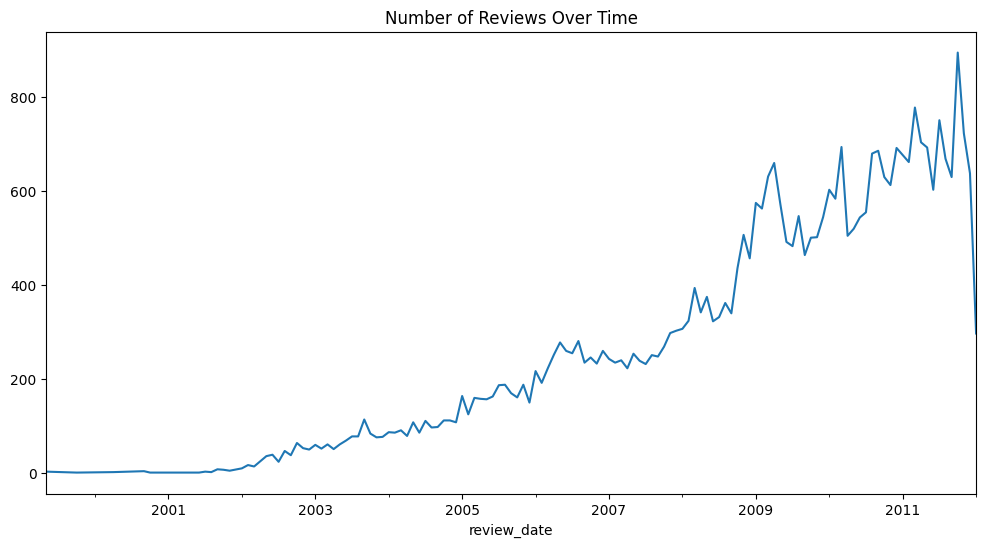

In [27]:
df['review_date'] = pd.to_datetime(df['review/timeUnix'], unit='s')

reviews_by_date = df['review_date'].dt.to_period('M').value_counts().sort_index()
reviews_by_date.plot(kind='line', figsize=(12, 6))
plt.title("Number of Reviews Over Time")
plt.show()


                                    beer/name  review_count
571                  Founders Breakfast Stout          1883
615   Founders KBS (Kentucky Breakfast Stout)          1439
575                   Founders Centennial IPA          1063
638                     Founders Red's Rye PA          1051
589                    Founders Dirty Bastard           983
1174                          Pilsner Urquell           946
592                   Founders Double Trouble           857
614                   Founders Imperial Stout           805
588                     Founders Devil Dancer           799
548                Founders Backwoods Bastard           778


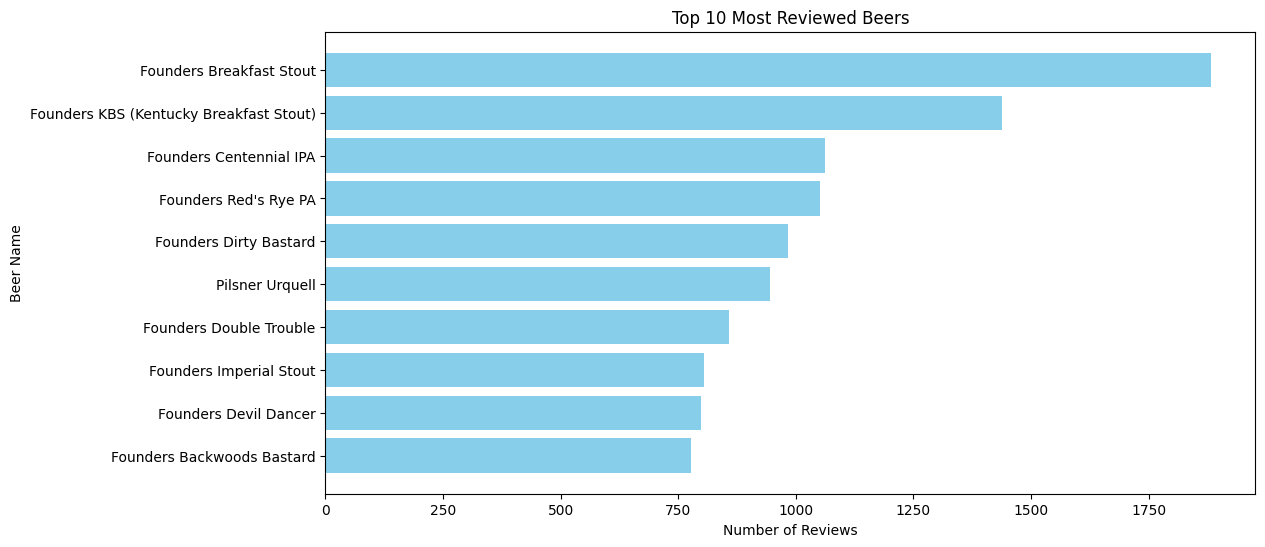

In [28]:
most_reviewed_beers = df.groupby('beer/name').size().reset_index(name='review_count')

most_reviewed_beers = most_reviewed_beers.sort_values(by='review_count', ascending=False)

top_10_beers = most_reviewed_beers.head(10)
print(top_10_beers)

plt.figure(figsize=(12, 6))
plt.barh(top_10_beers['beer/name'], top_10_beers['review_count'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('Beer Name')
plt.title('Top 10 Most Reviewed Beers')
plt.gca().invert_yaxis()
plt.show()


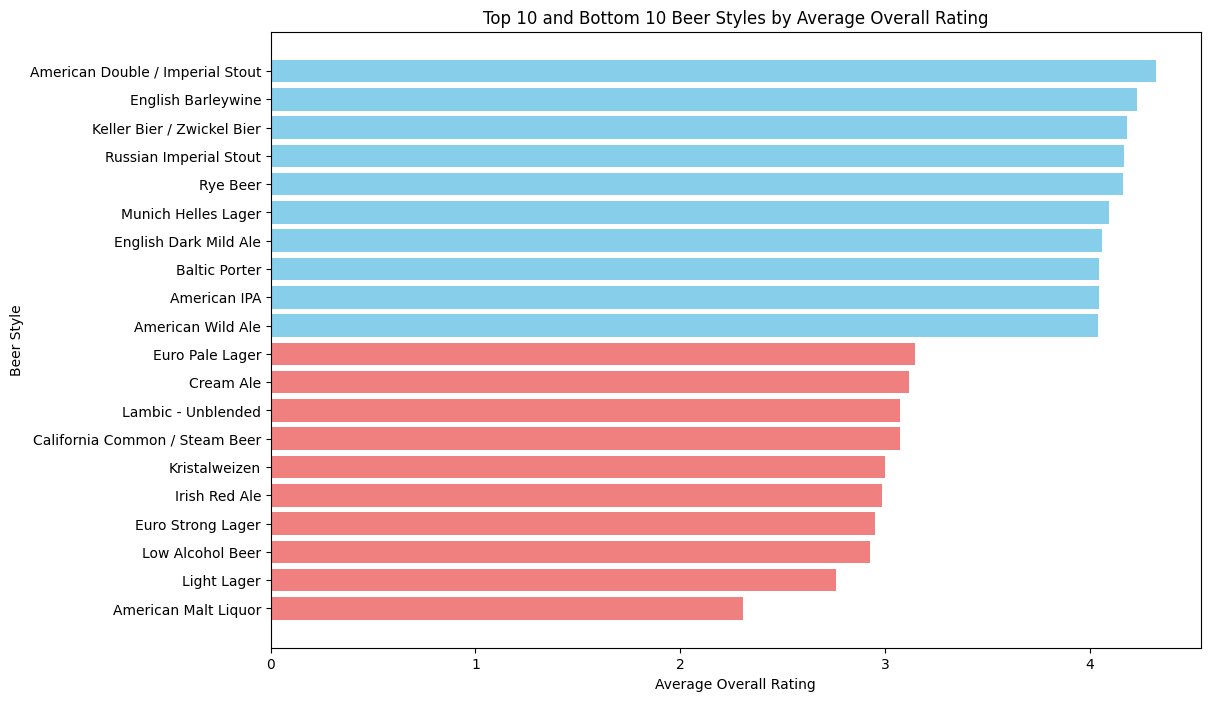

In [29]:
avg_ratings = df.groupby('beer/style')['review/overall'].mean().reset_index()

avg_ratings = avg_ratings.sort_values(by='review/overall', ascending=False)

top_10_ratings = avg_ratings.head(10)
bottom_10_ratings = avg_ratings.tail(10)

top_bottom_ratings = pd.concat([top_10_ratings, bottom_10_ratings])

plt.figure(figsize=(12, 8))
colors = ['skyblue' if i < 10 else 'lightcoral' for i in range(len(top_bottom_ratings))]
plt.barh(top_bottom_ratings['beer/style'], top_bottom_ratings['review/overall'], color=colors)
plt.xlabel('Average Overall Rating')
plt.ylabel('Beer Style')
plt.title('Top 10 and Bottom 10 Beer Styles by Average Overall Rating')
plt.gca().invert_yaxis()
plt.show()


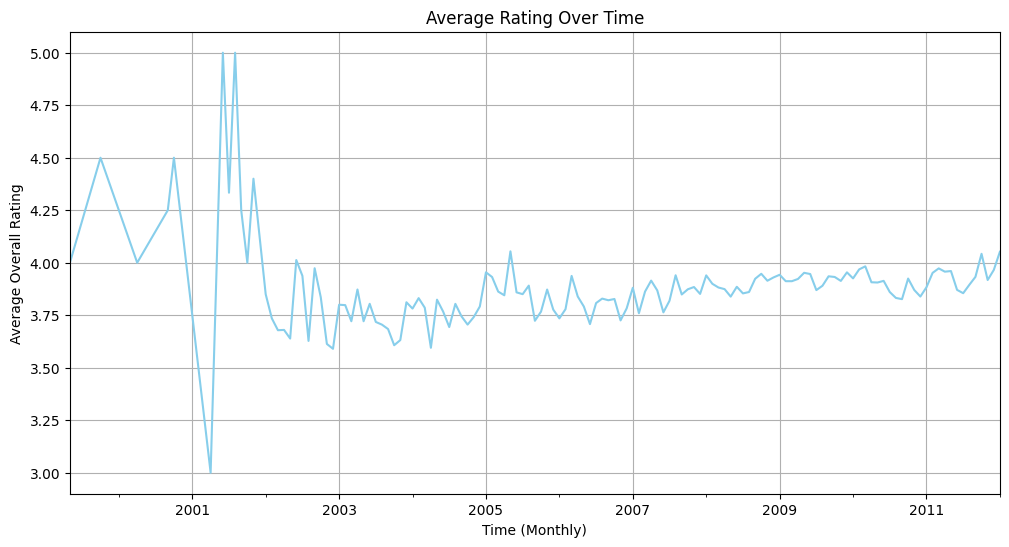

In [30]:
df['review_date'] = pd.to_datetime(df['review/timeUnix'], unit='s')

avg_rating_time = df.groupby(df['review_date'].dt.to_period('M'))['review/overall'].mean()

plt.figure(figsize=(12, 6))
avg_rating_time.plot(kind='line', color='skyblue')
plt.title('Average Rating Over Time')
plt.xlabel('Time (Monthly)')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()


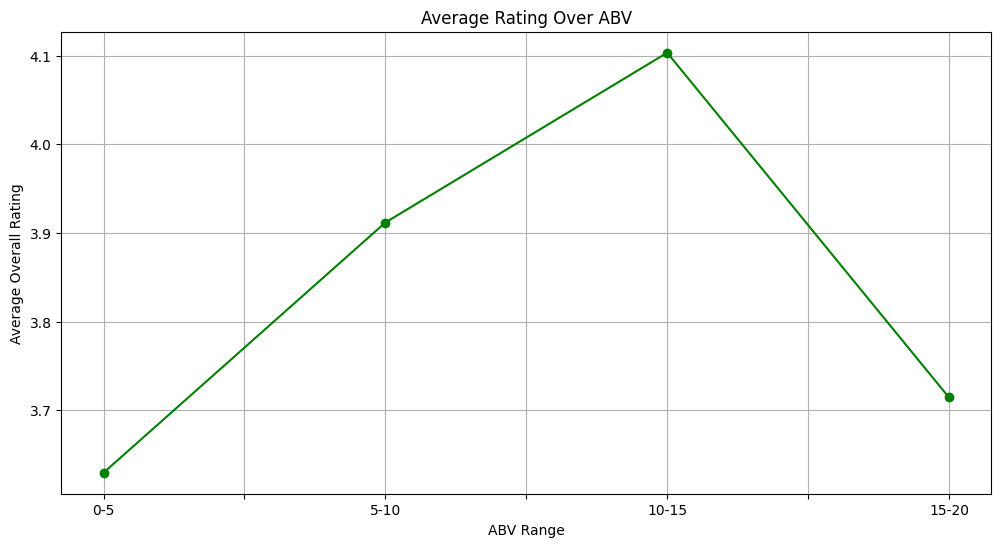

In [31]:
df['ABV_bin'] = pd.cut(df['beer/ABV'], bins=[0, 5, 10, 15, 20, 30], labels=['0-5', '5-10', '10-15', '15-20', '20+'])

avg_rating_abv = df.groupby('ABV_bin')['review/overall'].mean()

plt.figure(figsize=(12, 6))
avg_rating_abv.plot(kind='line', marker='o', color='green')
plt.title('Average Rating Over ABV')
plt.xlabel('ABV Range')
plt.ylabel('Average Overall Rating')
plt.grid(True)
plt.show()


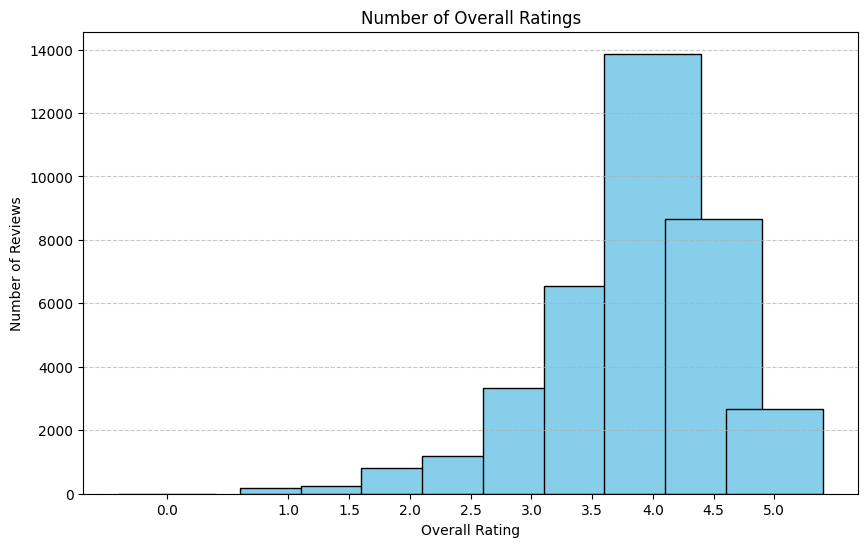

In [32]:
rating_counts = df['review/overall'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [34]:
df['review/overall'].unique()

array([4. , 3.5, 2.5, 3. , 4.5, 2. , 5. , 1.5, 1. , 0. ])

In [35]:
pip install imblearn

In [36]:
pip install lightgbm

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


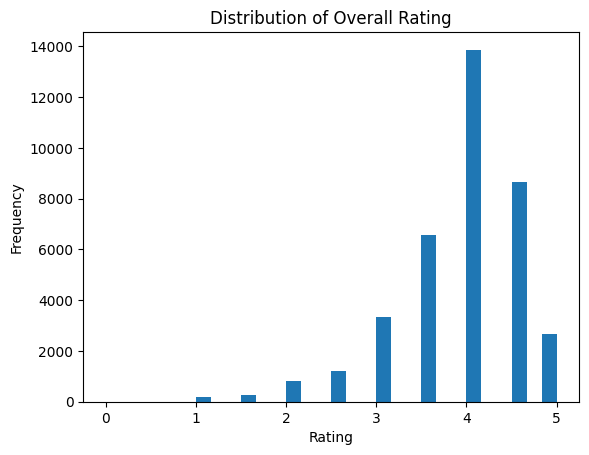

In [37]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('/content/train.csv')

print(df.isnull().sum())
df = df.dropna(subset=['review/text'])

plt.hist(df['review/overall'], bins=30)
plt.title('Distribution of Overall Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['review/text'] = df['review/text'].apply(preprocess_text)



In [38]:
df['beer/style'] = df['beer/style'].apply(preprocess_text)
df['beer/name'] = df['beer/name'].apply(preprocess_text)


In [39]:
print(df['review/overall'].isnull().sum())

0


0


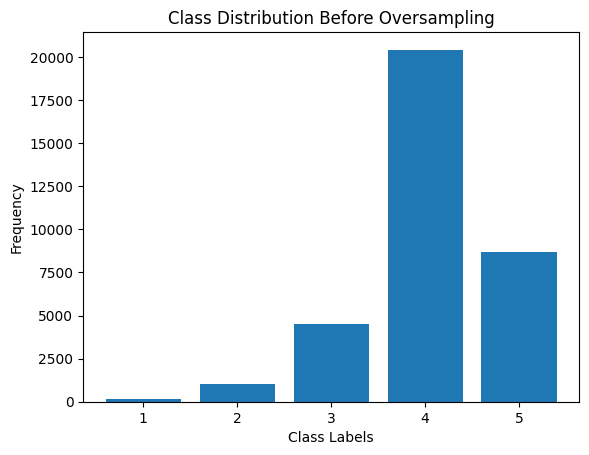

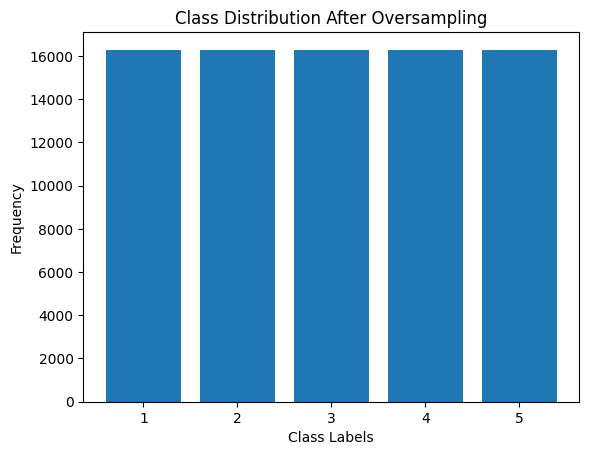

Accuracy: 0.67954055994257
              precision    recall  f1-score   support

           0       0.67      0.06      0.12        31
           1       0.59      0.33      0.43       183
           2       0.59      0.51      0.55       875
           3       0.71      0.84      0.77      4132
           4       0.61      0.43      0.51      1744

    accuracy                           0.68      6965
   macro avg       0.63      0.44      0.47      6965
weighted avg       0.67      0.68      0.66      6965



In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from imblearn.over_sampling import RandomOverSampler

bins = [0, 1.5, 2.5, 3.5, 4.5, 5.0]
labels = [1, 2, 3, 4, 5]
df['rating_category'] = pd.cut(df['review/overall'], bins=bins, labels=labels, right=False)

print(df['rating_category'].isnull().sum())

df = df.dropna(subset=['rating_category'])

label_encoder = LabelEncoder()
df['rating_category'] = label_encoder.fit_transform(df['rating_category'])

vectorizer = TfidfVectorizer(max_features=1000)
X_text_review = vectorizer.fit_transform(df['review/text'])
X_text_style = vectorizer.fit_transform(df['beer/style'])
X_text_name = vectorizer.fit_transform(df['beer/name'])

numerical_features = df[['review/appearance', 'review/aroma', 'review/palate', 'review/taste']].values

X_text_combined = hstack([X_text_review, X_text_style, X_text_name])
X = hstack([X_text_combined, numerical_features])

y = df['rating_category']

def plot_class_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts, tick_label=label_encoder.inverse_transform(unique))
    plt.title(title)
    plt.xlabel("Class Labels")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(y, "Class Distribution Before Oversampling")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

plot_class_distribution(y_resampled, "Class Distribution After Oversampling")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_resampled, y_resampled)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6435032304379038
              precision    recall  f1-score   support

           0       0.46      0.52      0.48        31
           1       0.44      0.67      0.53       183
           2       0.52      0.64      0.57       875
           3       0.81      0.60      0.69      4132
           4       0.52      0.75      0.62      1744

    accuracy                           0.64      6965
   macro avg       0.55      0.63      0.58      6965
weighted avg       0.69      0.64      0.65      6965



In [44]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_resampled, y_resampled)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.6394831299353912
              precision    recall  f1-score   support

           0       0.44      0.45      0.44        31
           1       0.42      0.67      0.52       183
           2       0.49      0.64      0.55       875
           3       0.82      0.59      0.68      4132
           4       0.53      0.76      0.62      1744

    accuracy                           0.64      6965
   macro avg       0.54      0.62      0.56      6965
weighted avg       0.69      0.64      0.65      6965

